


**Import libraries**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**HOUSE PRICES Dataset**

In [2]:
dataset = pd.read_csv("/content/Housing Prices Imputed.csv")

print(dataset.head(5))

   Index                                              Title  Bathrooms  \
0      0  Natalie 3BR Single Detached House for Sale in ...        3.0   
1      1  Townhouse with 2 Bedrooms for Sale at Hana Sou...        2.0   
2      2  RFO 1BR 2-Storey Rowhouse for Sale at Marytown...        1.0   
3      3  2-Storey 4BR House and Lot (Amanda Model) for ...        3.0   
4      4  5BR House for Sale at Camella Provence in Brgy...        3.0   

   Bedrooms  Car Spaces  Floor area (m²)  Land Size (m²)    Subdivision name  \
0         3           1            123.8           140.0  West Beverly Hills   
1         2           0             38.0            36.0          Hana South   
2         1           0             46.6            67.0      Marytown Place   
3         4           1            167.0           154.0    Governor's Hills   
4         5           0            166.0           143.0    Camella Provence   

  Block and Lot/Unit Number  Build (Year)  Rooms (total)       Price  
0  

# Analysis

In [3]:
dataset.shape

(2999, 12)

*Data Processing*

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print('Catergorical Variables:', len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print('Integer Variables:', len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print('Float Variables:', len(fl_cols))

Catergorical Variables: 3
Integer Variables: 3
Float Variables: 6


*Exploratory Data Analysis*

<Axes: >

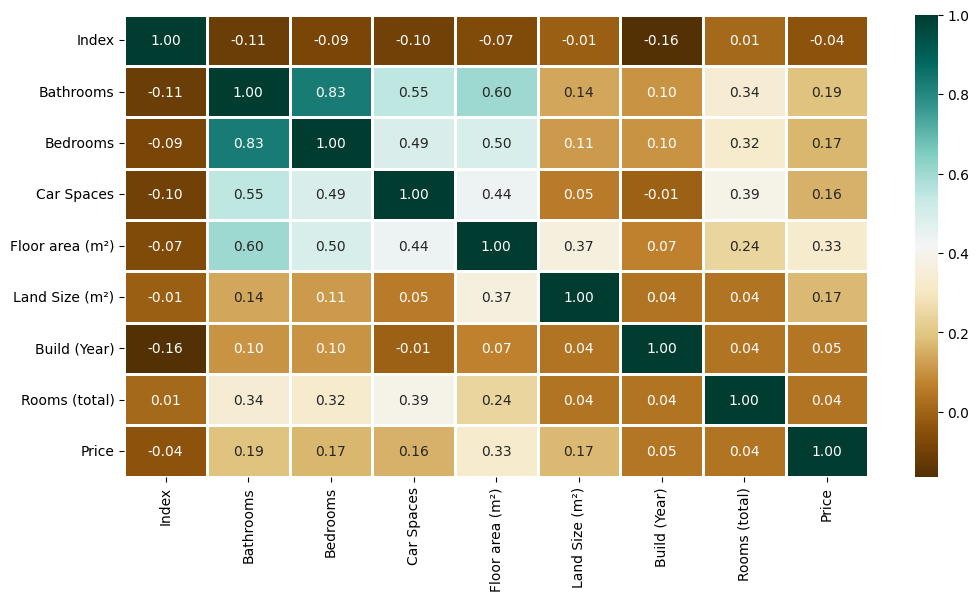

In [5]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize = (12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths=2,
            annot=True
            )

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

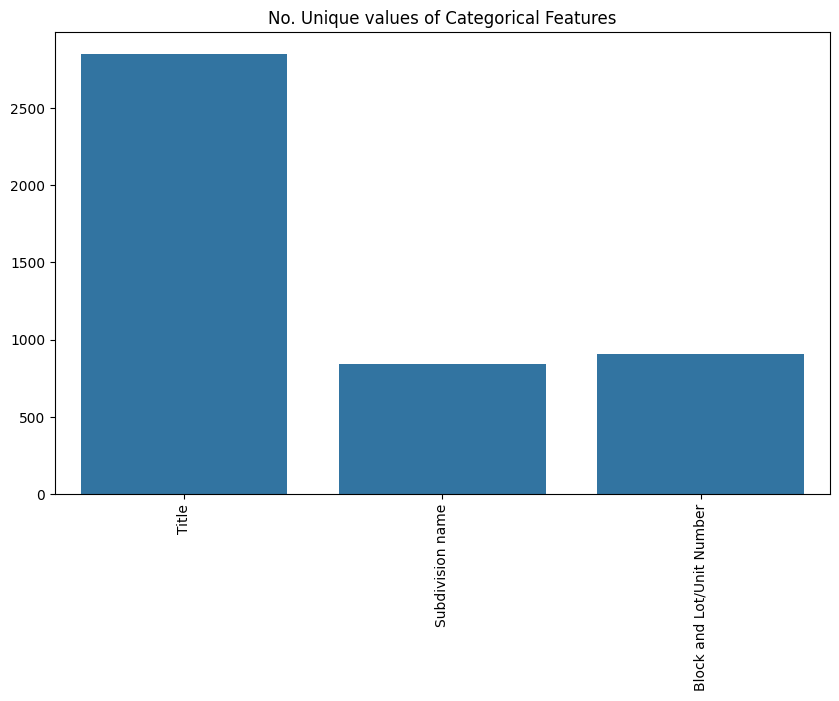

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

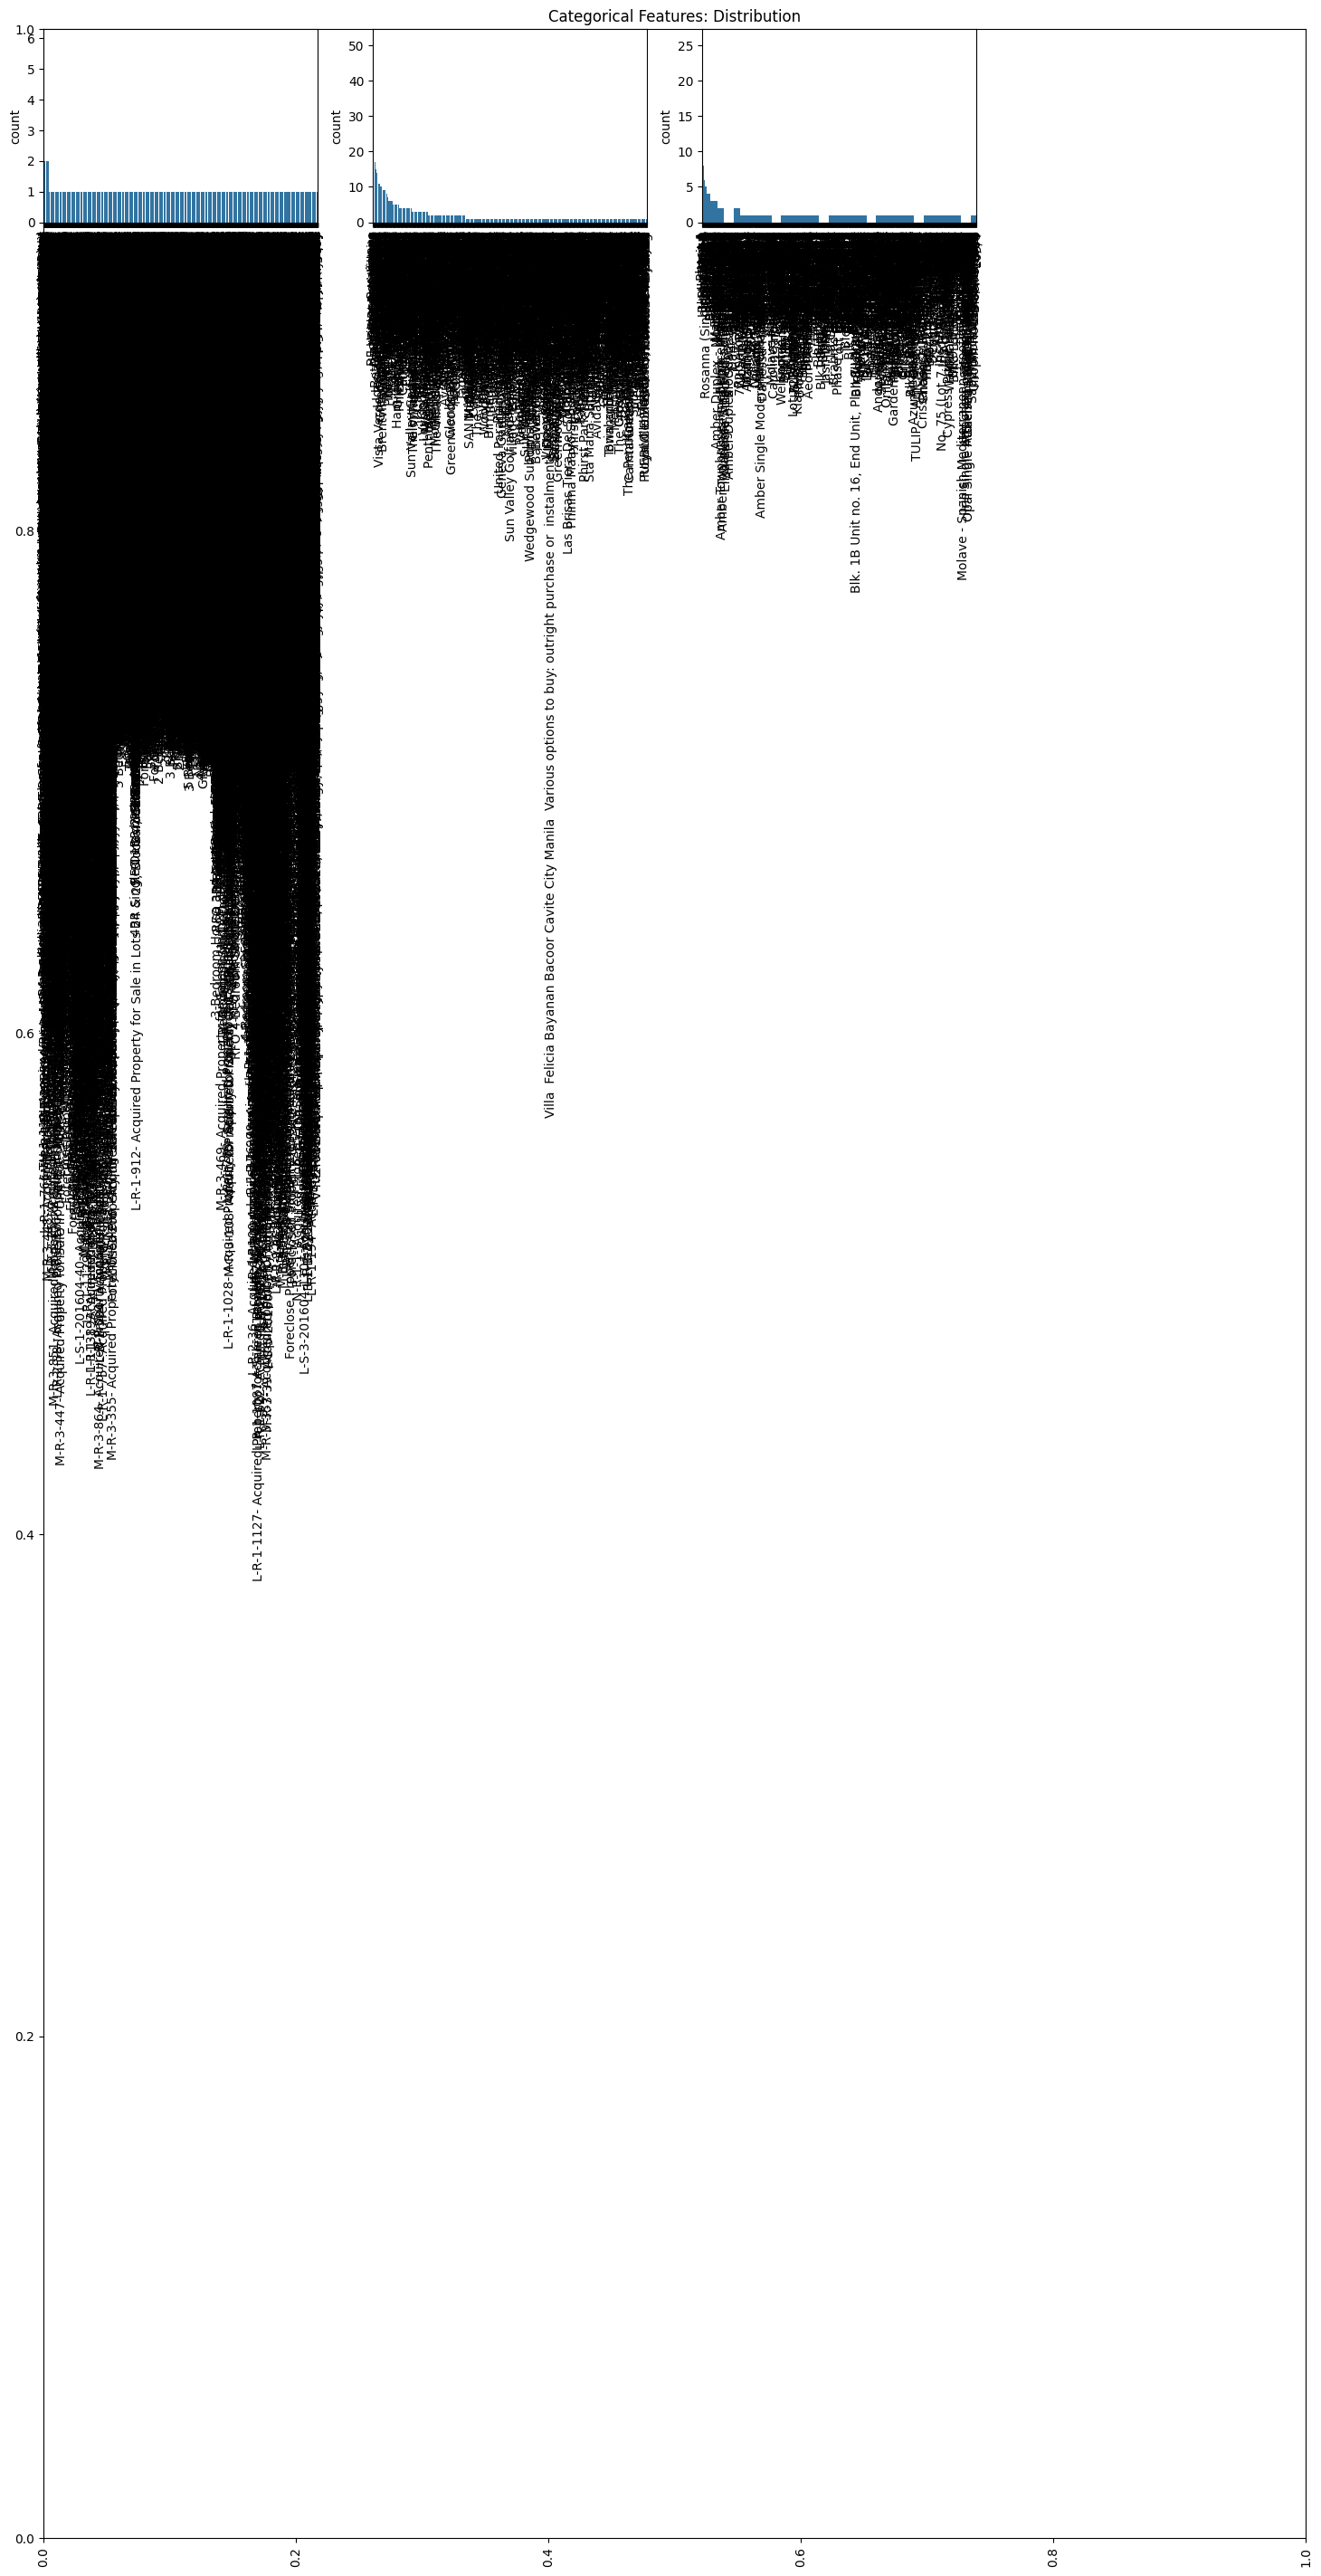

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [48]:
# prompt: whats next after this i want to data clean fist show the colum

dataset.columns

Index(['Bathrooms', 'Bedrooms', 'Car Spaces', 'Floor area (m²)',
       'Land Size (m²)', 'Rooms (total)', 'Price'],
      dtype='object')

**DROP COLUMNS HERE FIRST BEFORE NA INPUT**

In [20]:
# prompt: check fro na values

dataset.isnull().sum()

,0
Bathrooms,0
Bedrooms,0
Car Spaces,0
Floor area (m²),82
Land Size (m²),155
Rooms (total),0
Price,75


In [47]:
# prompt: fill those na values with mean

numerical_dataset.fillna(numerical_dataset.mean(), inplace=True)
print(numerical_dataset.isnull().sum())

Index              0
Bathrooms          0
Bedrooms           0
Car Spaces         0
Floor area (m²)    0
Land Size (m²)     0
Build (Year)       0
Rooms (total)      0
Price              0
dtype: int64


*Drop other na id ther is still null*

In [22]:
new_dataset = dataset.dropna()

In [23]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


# Prepare Test and Train

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = new_dataset.drop(['Price'], axis=1)
Y = new_dataset['Price']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [29]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

1.0207953300323354


In [61]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.4238685239196867

In [42]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

2.1720455874802984


**USE THE BEST MODEL**


In [45]:
# prompt: export model_RFR to joblib for usage later in web app

!pip install joblib
import joblib

# Export the model to a file
joblib.dump(model_RFR, 'model_RFR.joblib')

['model_RFR.joblib']

*SIMULATE THE APP*

In [66]:

# Load the saved model
loaded_model = joblib.load('model_RFR.joblib')

custom_data = {
    'Bathrooms'      :   2,
    'Bedrooms'       :    2,
    'Car Spaces'     :    1,
    'Floor area (m²)' :   0,
    'Land Size (m²)'  :   300,
    'Rooms (total)'    :  0
}

# data to pass
new_data = pd.DataFrame([
    custom_data
])


try:
    predicted_price = loaded_model.predict(new_data)[0]

    # Ensure price is not negative
    predicted_price = max(0, predicted_price)

    print(f"\nPredicted Housing Price: {predicted_price}")

except Exception as e:
    print(f"An error occurred during prediction: {e}")


Predicted Housing Price: 8712451.0
